# Import libraries and load model

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import pybedtools
from pybedtools import BedTool
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
import shap
import utils
%matplotlib inline

2024-01-19 10:25:19.340091: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term


/staging/leuven/stg_00002/lcb/nkemp/software/anaconda3/envs/paper_test_4/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


If you're using a GPU, the following commands should list the GPU as available.

In [2]:
!nvidia-smi
print(tf.config.list_physical_devices())

Fri Jan 19 10:26:26 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:BF:00.0 Off |                    0 |
| N/A   30C    P0    61W / 500W |      0MiB / 81920MiB |      0%   E. Process |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

2024-01-19 10:26:26.969935: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-19 10:26:27.046665: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-01-19 10:26:27.658269: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:bf:00.0 name: NVIDIA A100-SXM4-80GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 79.15GiB deviceMemoryBandwidth: 1.85TiB/s
2024-01-19 10:26:27.658364: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2024-01-19 10:26:27.665348: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2024-01-19 10:26:27.665429: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2

In [4]:
data_dictionary_location = 'data/background_seqs.pkl'
with open(data_dictionary_location, "rb") as f:
    nonAugmented_data_dict = pickle.load(f)

model_directory = '/staging/leuven/stg_00002/lcb/nkemp/chicken/20230720_models/logfc1_5/v1/'
model_name = 'model_epoch_06.hdf5'

DeepChickenBrain = utils.load_model(model_directory, model_name)

rn = np.random.choice(nonAugmented_data_dict.shape[0], 500, replace=False)
explainer_DeepChickenBrain = shap.DeepExplainer((DeepChickenBrain.inputs, DeepChickenBrain.layers[-1].output), nonAugmented_data_dict["valid_data"][rn])

DeepChickenBrain.summary()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Getting region predictions and contribution scores

For scoring a region from any species, you will need its genome. To download the chicken genome for example, you can use https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000002315.5/ . Put the genome in the data/ subdirectory.

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import utils
location=("chr18", 61108475, 61108975)
genomefile_path="/staging/leuven/res_00001/genomes/mus_musculus/mm10_ucsc/fasta/mm10.fa"
seq_onehot = utils.one_hot_encode_along_row_axis(BedTool.seq(location, genomefile_path))


## Plotting prediction scores

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


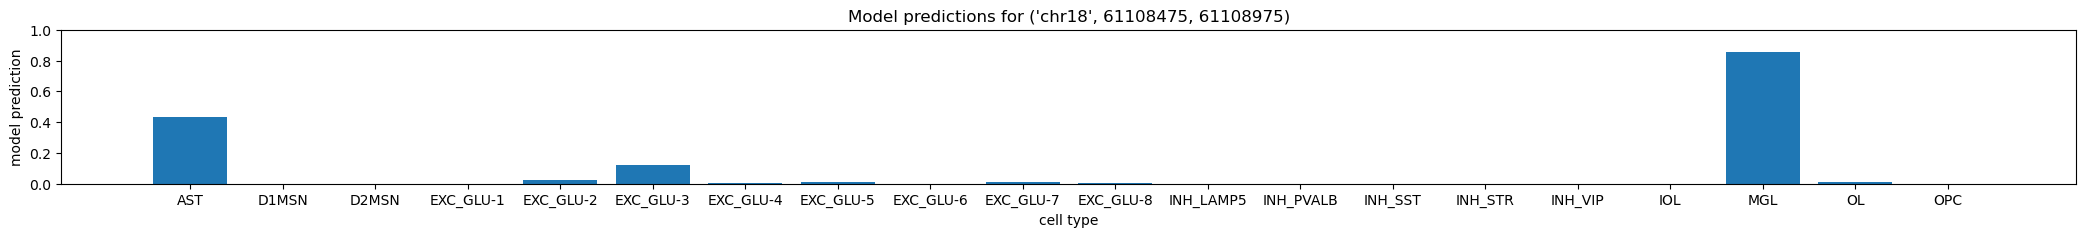

In [5]:
#DeepChickenBrain classes
model_classes = ['AST','D1MSN','D2MSN','EXC_GLU-1','EXC_GLU-2','EXC_GLU-3','EXC_GLU-4','EXC_GLU-5','EXC_GLU-6','EXC_GLU-7','EXC_GLU-8','INH_LAMP5','INH_PVALB','INH_SST','INH_STR','INH_VIP','IOL','MGL','OL','OPC']
prediction = utils.plot_model_predictions(DeepChickenBrain, location, seq_onehot, model_classes)

## Plotting region contribution scores

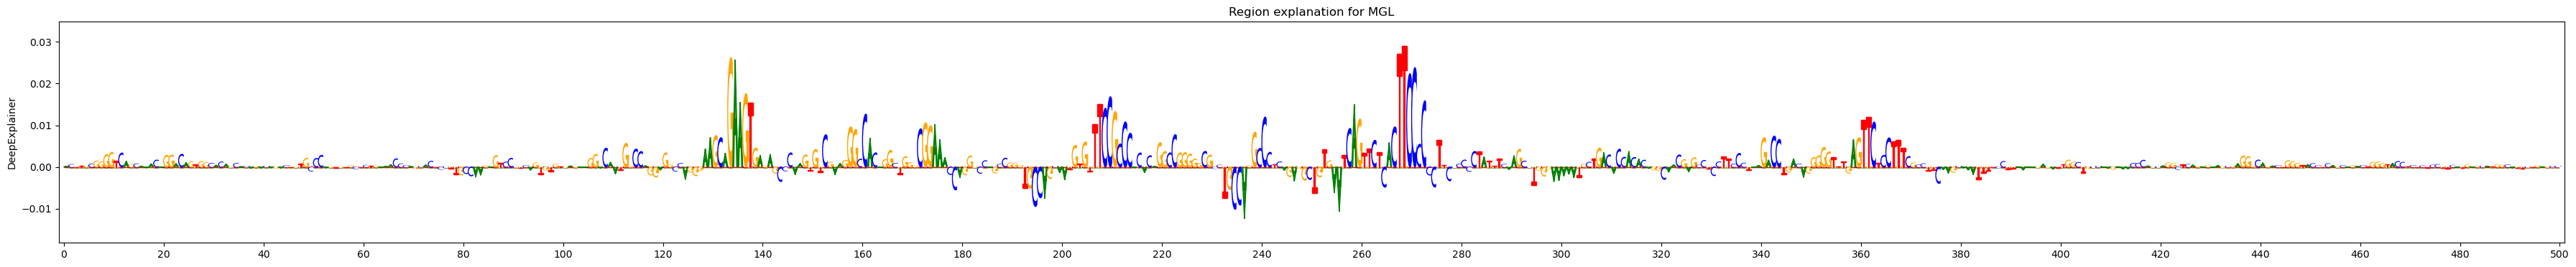

In [7]:
import utils
ntrack = 1
fig = plt.figure(figsize=(45,ntrack*4))
#seq_onehot = nonAugmented_data_dict["test_data"][1:2]

topic=5
# Plot deepexplainer for the selected topics
track_no=1
ax1 = utils.plot_deepexplainer_givenax(explainer_DeepChickenBrain, fig, ntrack, track_no, seq_onehot, 'MGL', model_classes)

